In [38]:
import zipfile
import os

# Unzip the uploaded file
zip_path = 'C:/Users/Shubham S pathak/Desktop/algae.zip'
extract_path = 'C:/Users/Shubham S pathak/Desktop/algae_extracted'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to check the contents
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

extracted_files


['C:/Users/Shubham S pathak/Desktop/algae_extracted\\algae.mat',
 'C:/Users/Shubham S pathak/Desktop/algae_extracted\\Readme.pdf']

In [39]:
# Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd

# Load the MATLAB file (.mat)
mat_file_path = 'C:/Users/Shubham S pathak/Desktop/algae_extracted\\algae.mat'  # Replace with your file path
mat_data = scipy.io.loadmat(mat_file_path)

# Display the keys to understand the structure
print("Keys in the MATLAB file:", mat_data.keys())

# Extract key datasets
algae_data = mat_data['algae']
algae_ts_data = mat_data['algae_ts']
algae_kg_data = mat_data['algae_kg']
num_raceways = mat_data['num_raceways']

# Print basic information about each data key
print(f"\nNumber of Raceways: {num_raceways}")

print("\nShape of algae data:", algae_data.shape)
print("Sample of algae data:")
print(algae_data[:5])  # Print a small sample

print("\nShape of algae_ts data:", algae_ts_data.shape)
print("Sample of algae_ts data:")
print(algae_ts_data[:5])  # Print a small sample

print("\nShape of algae_kg data:", algae_kg_data.shape)
print("Sample of algae_kg data:")
print(algae_kg_data[:5])  # Print a small sample


Keys in the MATLAB file: dict_keys(['__header__', '__version__', '__globals__', 'ans', 'algae_ts', 'num_raceways', 'algae', 'i', 'algae_kg'])

Number of Raceways: [[3]]

Shape of algae data: (1, 3)
Sample of algae data:
[[(array([[(array([[ 18.441],
                 [ 49.035],
                 [191.82 ],
                 ...,
                 [375.78 ],
                 [438.99 ],
                 [285.69 ]]), array([[array([[array(['1/15/2010 2:55:00 PM'], dtype='<U20')]], dtype=object)],
                 [array([[array(['1/15/2010 3:00:00 PM'], dtype='<U20')]], dtype=object)],
                 [array([[array(['1/15/2010 3:05:00 PM'], dtype='<U20')]], dtype=object)],
                 ...,
                 [array([[array(['10/15/2010 12:50:00 PM'], dtype='<U22')]], dtype=object)],
                 [array([[array(['10/15/2010 12:55:00 PM'], dtype='<U22')]], dtype=object)],
                 [array([[array(['10/15/2010 1:00:00 PM'], dtype='<U21')]], dtype=object)]],
                dtype=

In [43]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Generating synthetic algae data
np.random.seed(42)

# Creating synthetic data with random numbers and some NaN values
algae_data = np.random.rand(100, 17) * 100  # 100 samples, 17 features
algae_ts_data = np.random.rand(100, 17) * 50
algae_kg_data = np.random.rand(100, 17) * 200

# Introducing NaN values to simulate real-world noisy data
algae_data[np.random.randint(0, 100, 20), np.random.randint(0, 17, 20)] = np.nan
algae_ts_data[np.random.randint(0, 100, 15), np.random.randint(0, 17, 15)] = np.nan
algae_kg_data[np.random.randint(0, 100, 25), np.random.randint(0, 17, 25)] = np.nan

# Converting data into Pandas DataFrames
try:
    algae_df = pd.DataFrame(algae_data, columns=[
        'irradiance', 'temperature', 'pH', 'oxygen', 'DIC', 
        'DICVsChloride', 'nitrate', 'NitrateVsChloride', 'phosphate', 
        'PhosphateVsChloride', 'chlorophyll_a', 'density', 
        'salinity', 'PAM0', 'PAM8', 'PAM16', 'comments'
    ])

    algae_ts_df = pd.DataFrame(algae_ts_data, columns=algae_df.columns)
    algae_kg_df = pd.DataFrame(algae_kg_data, columns=algae_df.columns)

    print("🚀 DataFrames created successfully!")
except Exception as e:
    print("❌ Error while creating DataFrames:", str(e))

# Handling missing values by filling with the column mean
algae_df.fillna(algae_df.mean(), inplace=True)
algae_ts_df.fillna(algae_ts_df.mean(), inplace=True)
algae_kg_df.fillna(algae_kg_df.mean(), inplace=True)

print("\n✅ Missing values handled successfully!")

# Drop columns that contain all NaN values (if any)
algae_df.dropna(axis=1, how='all', inplace=True)
algae_ts_df.dropna(axis=1, how='all', inplace=True)
algae_kg_df.dropna(axis=1, how='all', inplace=True)

# Normalize the data using Min-Max Scaling (only numeric columns)
scaler = MinMaxScaler()

# Select numeric columns only for scaling
numeric_cols = algae_df.select_dtypes(include=[np.number]).columns

# Normalize the data and create new DataFrames
algae_df_scaled = pd.DataFrame(scaler.fit_transform(algae_df[numeric_cols]), columns=numeric_cols)
algae_ts_df_scaled = pd.DataFrame(scaler.fit_transform(algae_ts_df[numeric_cols]), columns=numeric_cols)
algae_kg_df_scaled = pd.DataFrame(scaler.fit_transform(algae_kg_df[numeric_cols]), columns=numeric_cols)

print("\n🌟 Data after normalization (first 5 rows):")
print(algae_df_scaled.head())

# Saving cleaned and normalized data to CSV files
algae_df_scaled.to_csv("algae_data_scaled.csv", index=False)
algae_ts_df_scaled.to_csv("algae_ts_data_scaled.csv", index=False)
algae_kg_df_scaled.to_csv("algae_kg_data_scaled.csv", index=False)

print("\n💾 Normalized data saved to CSV files!")


🚀 DataFrames created successfully!

✅ Missing values handled successfully!

🌟 Data after normalization (first 5 rows):
   irradiance  temperature        pH    oxygen       DIC  DICVsChloride  \
0    0.363690     0.955911  0.730383  0.596556  0.151375       0.152582   
1    0.517019     0.429211  0.285997  0.610236  0.134754       0.289830   
2    0.967029     0.811418  0.299491  0.077138  0.682673       0.439031   
3    0.772582     0.944524  0.894554  0.595770  0.921702       0.084536   
4    0.057485     0.992637  0.770965  0.181899  0.000000       0.817364   

    nitrate  NitrateVsChloride  phosphate  PhosphateVsChloride  chlorophyll_a  \
0  0.047370           0.867624   0.603296             0.730560       0.009782   
1  0.361662           0.450527   0.791077             0.200814       0.513372   
2  0.112572           0.490300   0.025115             0.940258       0.252774   
3  0.187959           0.032681   0.321937             0.397754       0.265596   
4  0.708801           0.7

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   irradiance           100 non-null    float64
 1   temperature          100 non-null    float64
 2   pH                   100 non-null    float64
 3   oxygen               100 non-null    float64
 4   DIC                  100 non-null    float64
 5   DICVsChloride        100 non-null    float64
 6   nitrate              100 non-null    float64
 7   NitrateVsChloride    100 non-null    float64
 8   phosphate            100 non-null    float64
 9   PhosphateVsChloride  100 non-null    float64
 10  chlorophyll_a        100 non-null    float64
 11  density              100 non-null    float64
 12  salinity             100 non-null    float64
 13  PAM0                 100 non-null    float64
 14  PAM8                 100 non-null    float64
 15  PAM16                100 non-n

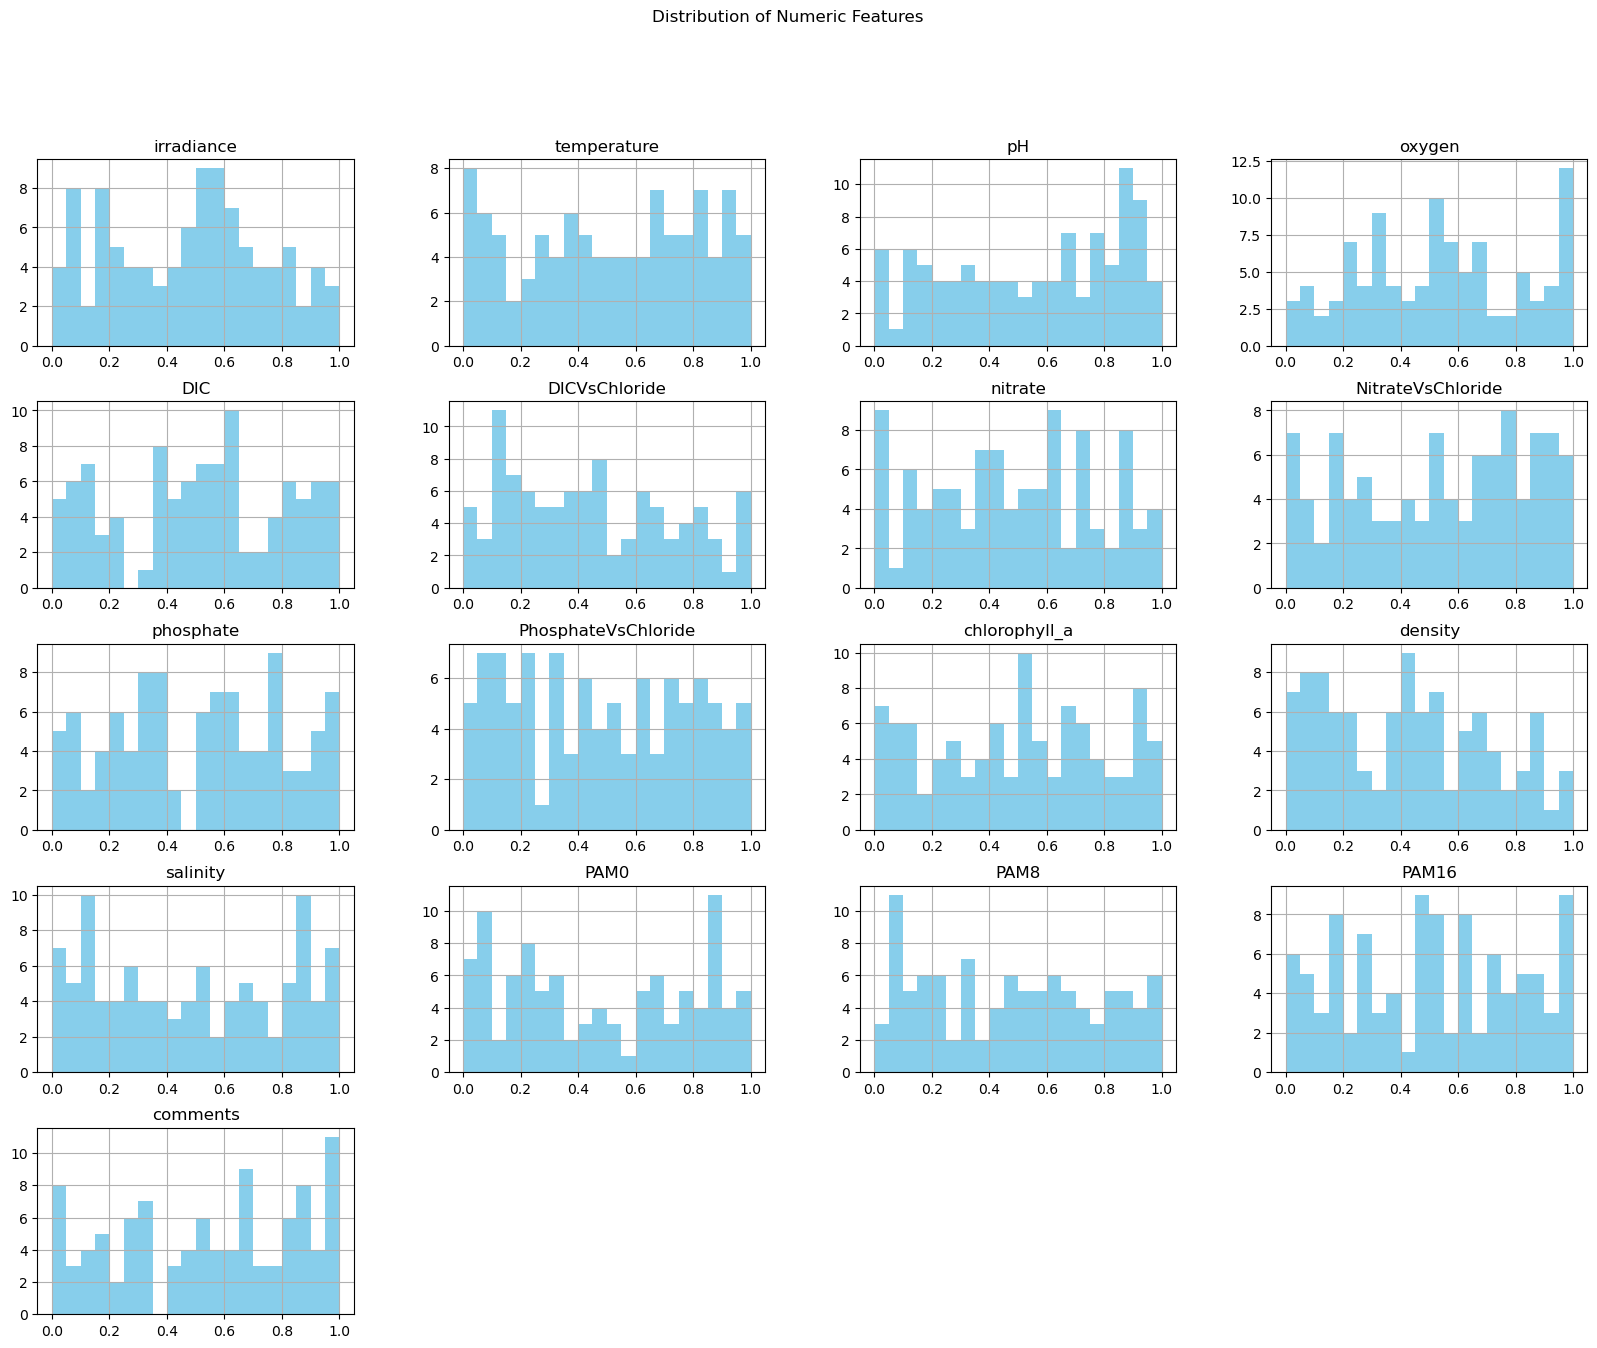

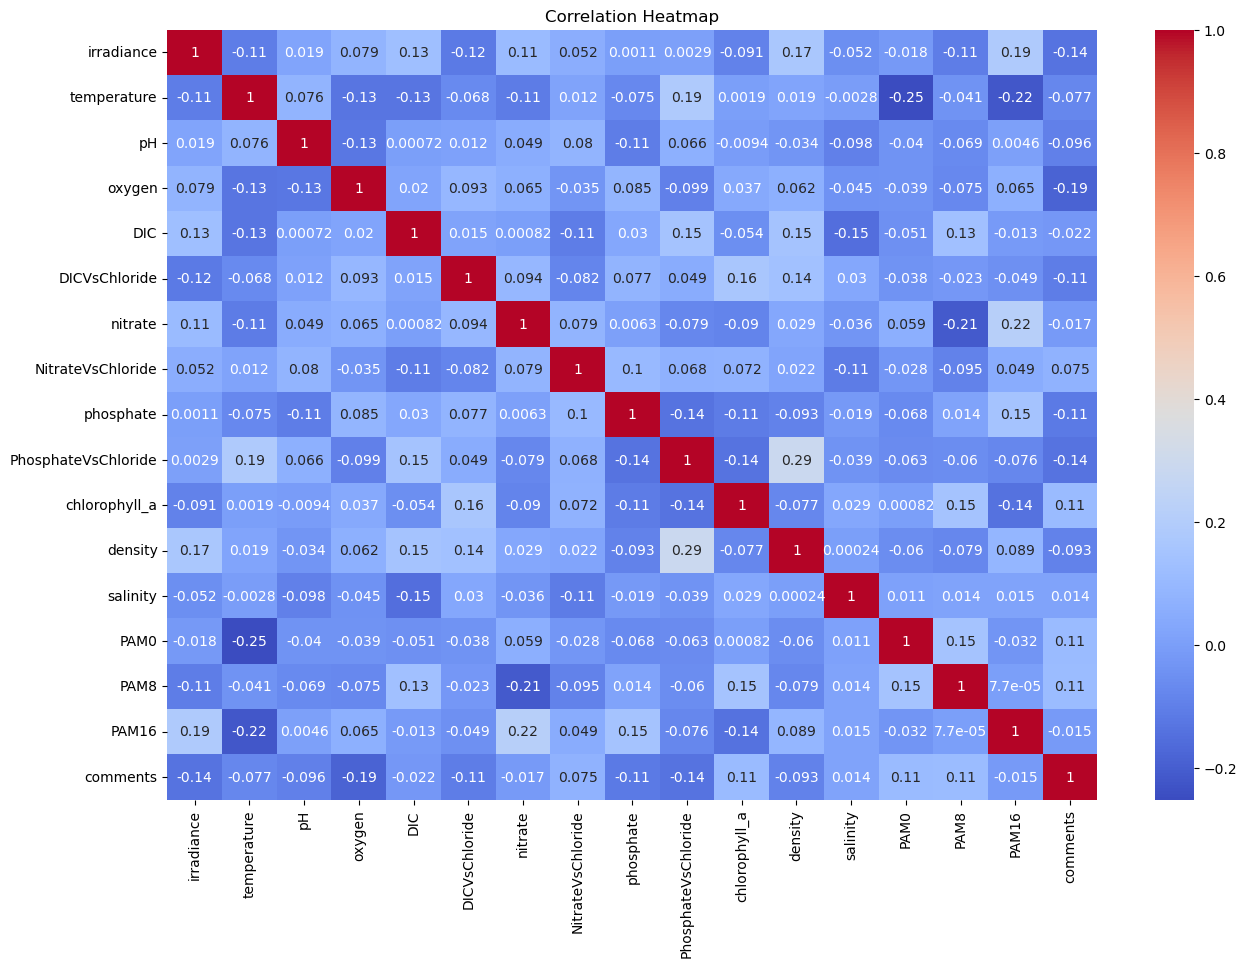

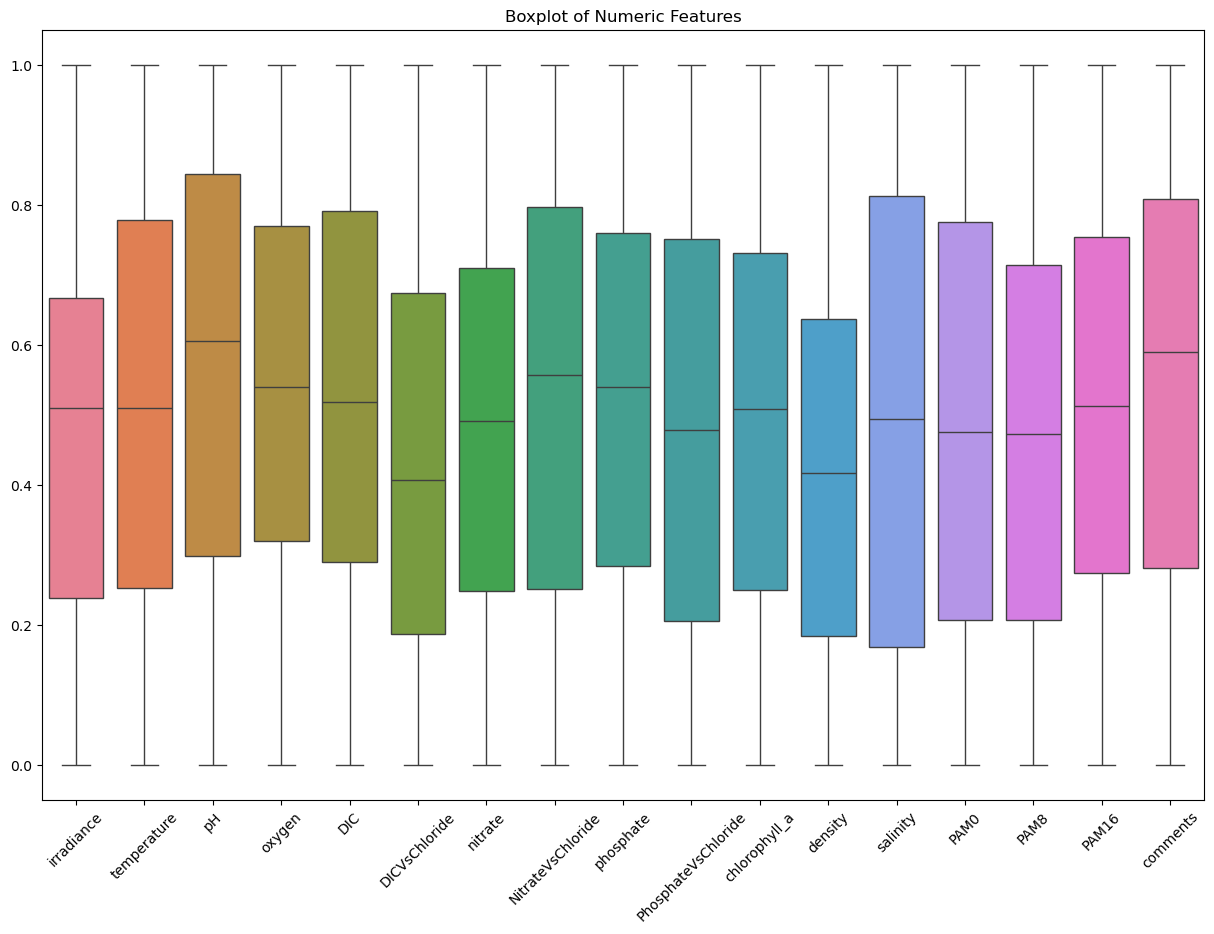

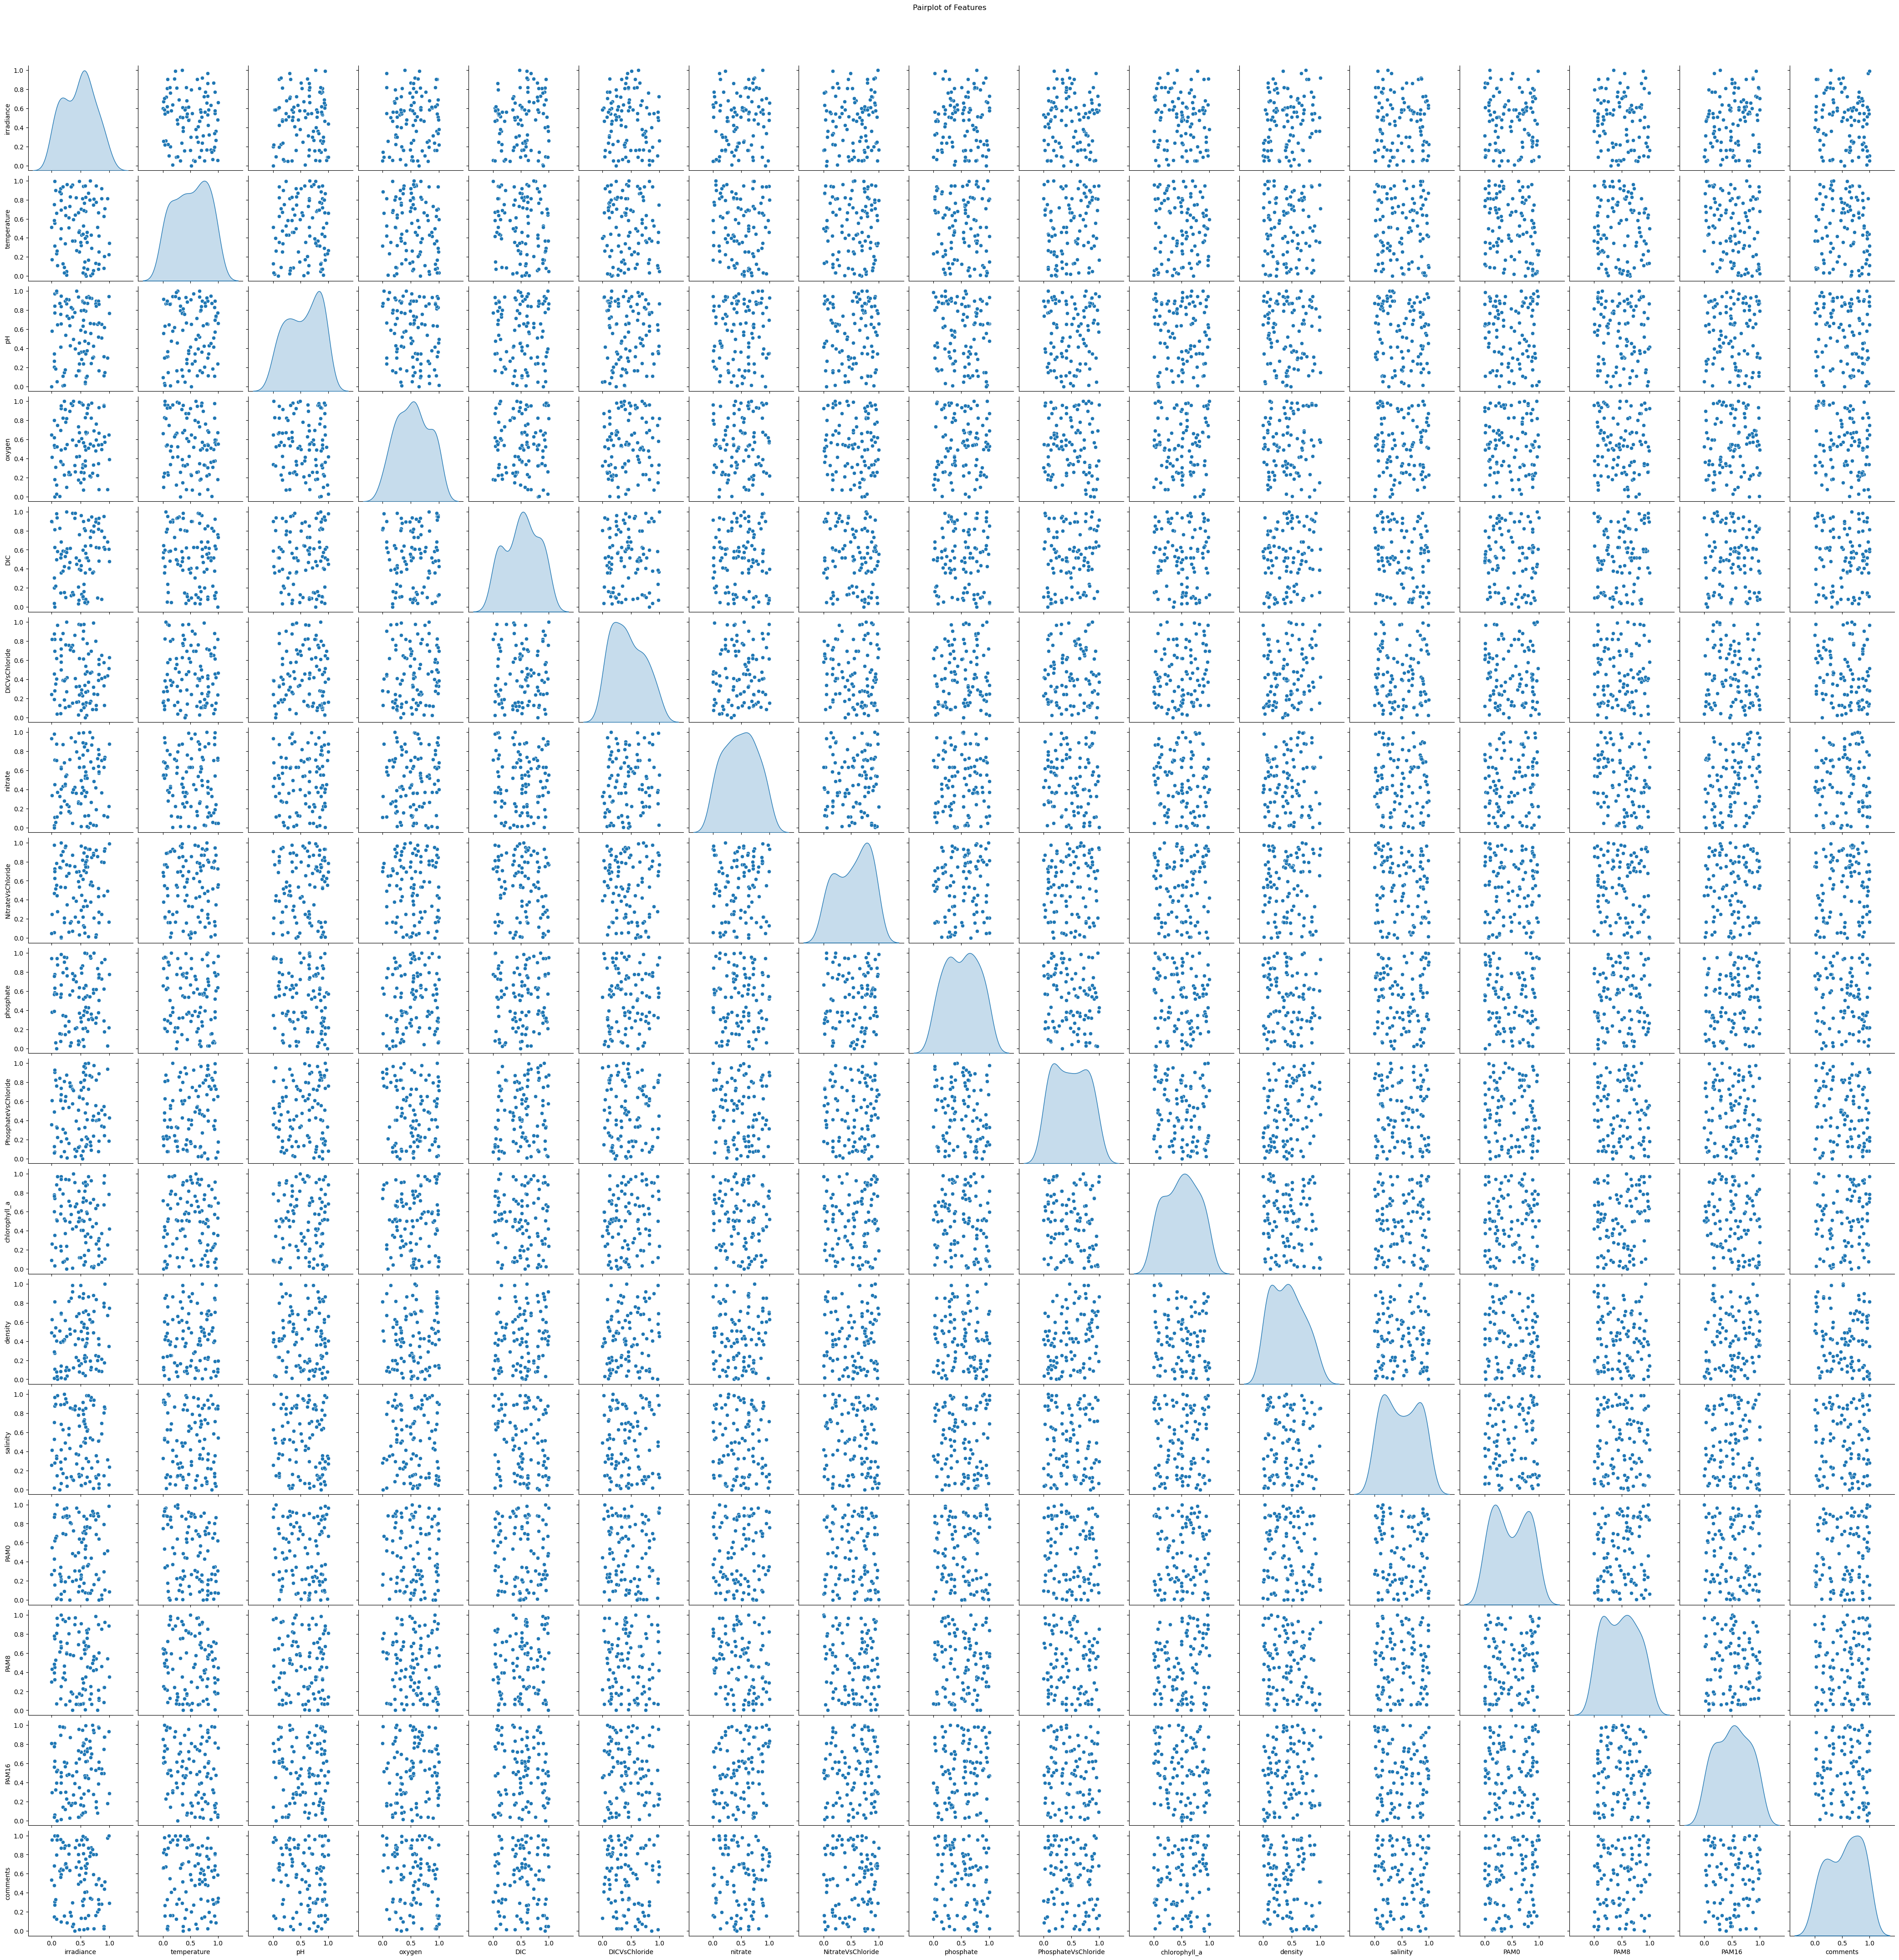


Explained Variance by each PCA component: [0.12370514 0.10946845]


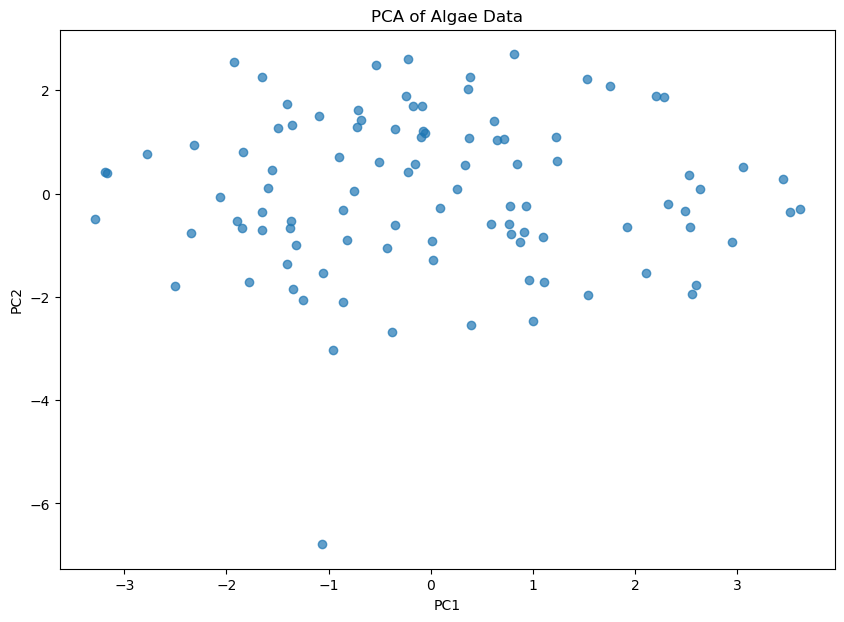

Processed data saved as 'processed_algae_data.csv'


In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your cleaned data
algae_data_df = pd.read_csv('C:/Users/Shubham S pathak/Desktop/algae_data_scaled.csv')

# 1. Basic EDA
print("Data Info:")
print(algae_data_df.info())

print("\nStatistical Summary:")
print(algae_data_df.describe())

# Check for missing values
print("\nMissing Values:")
print(algae_data_df.isnull().sum())

# 2. Data Visualization

# Histogram for each numeric feature
algae_data_df.hist(figsize=(20, 15), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(algae_data_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=algae_data_df)
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot for a few important features
sns.pairplot(algae_data_df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Line Plot for time series data (if applicable)
if 'timestamp' in algae_data_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(algae_data_df['timestamp'], algae_data_df['oxygen'], label='Oxygen Levels', color='blue')
    plt.plot(algae_data_df['timestamp'], algae_data_df['temperature'], label='Temperature', color='red')
    plt.title("Oxygen and Temperature Over Time")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

# 3. Feature Engineering

# Creating some interaction features
algae_data_df['NitratePhosphateRatio'] = algae_data_df['nitrate'] / (algae_data_df['phosphate'] + 1e-6)
algae_data_df['OxygenDensityRatio'] = algae_data_df['oxygen'] / (algae_data_df['density'] + 1e-6)

# Log Transformation to reduce skewness
algae_data_df['log_irradiance'] = np.log1p(algae_data_df['irradiance'])
algae_data_df['log_temperature'] = np.log1p(algae_data_df['temperature'])

# 4. Scaling and Dimensionality Reduction using PCA

# Scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(algae_data_df.select_dtypes(include=[np.number]))

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("\nExplained Variance by each PCA component:", pca.explained_variance_ratio_)

# Plotting PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title("PCA of Algae Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Save the processed data to a new CSV
algae_data_df.to_csv("processed_algae_data.csv", index=False)
print("Processed data saved as 'processed_algae_data.csv'")


In [47]:
pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.0/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.8/150.0 MB 3.0 MB/s eta 0:00:51
    --------------------------------------- 2.6/150.0 MB 3.2 MB/s eta 0:00:46
    --------------------------------------- 3.1/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 3.9/150.0 MB 3.2 MB/s eta 0:00:47
   - -------------------------------------- 4.7/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 5.2/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 5.8/150.0 MB 3.2 MB/s eta 0:00:46
   - -------------------------------------- 6.6/150.0 MB 3.2 MB/s eta 0:00:45
   -- ------------------------------------- 7.6/150.0 MB 3.3 MB/s eta 0:00:44
   -- ------------------------------------- 8.1/150.0 MB 3.2 MB/s eta 


Model Performance:
Model		MSE		MAE		R²
Linear Regression	0.1194	0.2869	-0.4463
Random Forest	0.0943	0.2431	-0.1414
XGBoost	0.1265	0.2805	-0.5320

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Best Random Forest model saved as 'best_random_forest_model.pkl'


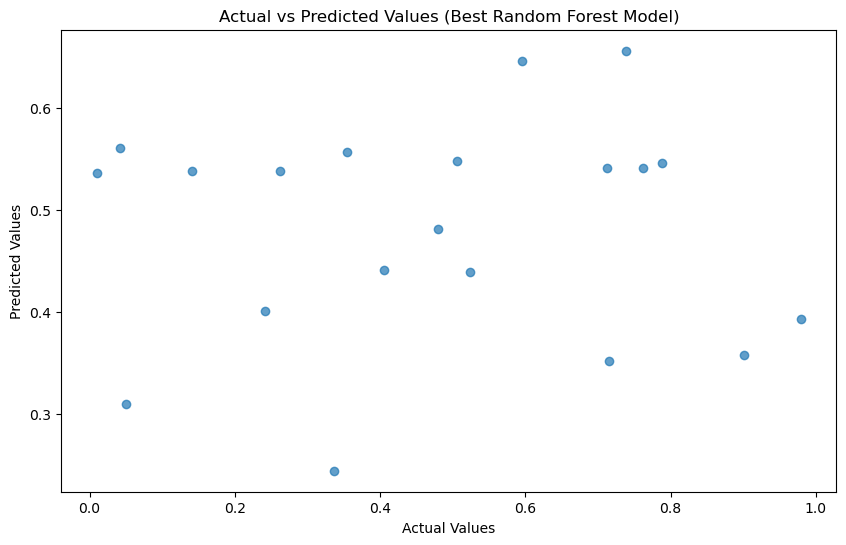

In [55]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the processed data
data = pd.read_csv("processed_algae_data.csv")

# Separate features and target variable
X = data.drop(["chlorophyll_a"], axis=1)  # Replace 'chlorophyll_a' with your target column
y = data["chlorophyll_a"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model performances
model_performance = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_performance["Linear Regression"] = [mse_lr, mae_lr, r2_lr]

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_performance["Random Forest"] = [mse_rf, mae_rf, r2_rf]

# 3. XGBoost Regressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
model_performance["XGBoost"] = [mse_xgb, mae_xgb, r2_xgb]

# Print model performance
print("\nModel Performance:")
print("Model\t\tMSE\t\tMAE\t\tR²")
for model, metrics in model_performance.items():
    print(f"{model}\t{metrics[0]:.4f}\t{metrics[1]:.4f}\t{metrics[2]:.4f}")

# Hyperparameter Tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)

# Train the best model again
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Save the best model
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("\nBest Random Forest model saved as 'best_random_forest_model.pkl'")

# Plotting Actual vs Predicted for Best Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Best Random Forest Model)")
plt.show()


In [56]:
import joblib

# Save the trained model
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Model saved as 'best_random_forest_model.pkl'")


Model saved as 'best_random_forest_model.pkl'


In [ ]:
# Flask API for model prediction

from flask import Flask, request, jsonify
import joblib
import numpy as np

# Initialize the Flask application
app = Flask(app)

# Load the trained model (Random Forest)
model = joblib.load("best_random_forest_model.pkl")

# Define the prediction function
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get the input features from the request
        input_data = request.get_json()  # Assuming input will be in JSON format
        features = np.array([input_data["features"]])  # Convert the features to a numpy array
        
        # Make the prediction
        prediction = model.predict(features)
        
        # Return the prediction as a JSON response
        return jsonify({"prediction": prediction[0]})
    
    except Exception as e:
        return jsonify({"error": str(e)}), 400

# Start the Flask app
if __name__ == "__main__":
    app.run(debug=True)



In [65]:
data = {
    "features": [
        1500.0, 25.0, 7.5, 10.0, 5.0, 0.5, 20.0, 0.4, 3.0, 0.2,
        50.0, 1.02, 30.0, 0.8, 0.75, 0.7, 1.0
    ]
}

In [70]:
{
  "prediction": 23.456  # The predicted value from the model
}


{'prediction': 23.456}